In [1]:
%%HTML
<style>
div.prompt {display:none}
</style>
// hide input prompt
$(document).ready(function() {
    $('div.prompt').css('display', 'none');
});

# Polynomial Regression 이해

Polynomial Regression 클래스로 다항식 변환

In [4]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

#다항식으로 변환한 단항식 생성 , [[0,1],[2,3]]의 2행2열 생성 
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n',X)

#degree=2 2차 다항식으로 변환하기위해 PolynomialFeatures를 이용하여변환
poly = PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr =poly.transform(X)
print('변형된 2차 다항식 계수 feature:\n ',poly_ftr)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
변형된 2차 다항식 계수 feature:
  [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


3차 다항식 결정삾을 구하는 함수

In [7]:
def polynimial_func(X):
    y = 1+2*X[:,0]+3*X[:,0]**2 +4*X[:,1]**3
#     print(X[:,0])
#     print(X[:,1])
    return y

X = np.arange(0,4).reshape(2,2)

print('일차 단항식 계수 feature:\n',X,'\n')
y=polynimial_func(X)
print('삼차 단항식 결정값: \n',y)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]] 

삼차 단항식 결정값: 
 [  5 125]


In [10]:
#3차 다항식 변환

from sklearn.linear_model import LinearRegression
poly_ftr = PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n',poly_ftr)

model = LinearRegression()
model.fit(poly_ftr,y)
print('회귀계수 \n', np.round(model.coef_,2))
print('회귀 shape:',model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]
회귀계수 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]
회귀 shape: (10,)


### 사이킷런 파이프라인(Pipeline)을 이용하여 3차 다항회귀 학습

사이킷런의 Pipeline 객체는 Feature 엔지니어링 변환과 모델 학습/예측을 순차척으로 결합해줍니다.

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

def polynomial_func(X):
    y = 1+2*X[:,0]+3*X[:,0]**2+4*X[:,1]**3
    return y

model = Pipeline([('poly',PolynomialFeatures(degree=3)),
                 ('linear',LinearRegression())])
X = np.arange(4).reshape(2,2)
y = polynomial_func(X)

model = model.fit(X,y)
print('Polynomial 회귀 계수\n', np.round(model.named_steps['linear'].coef_,2))

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


과제 1_0531
다항 회귀를 이용한 과소적합, 과대적합 비교 및 인사이트 도출을 위한 사례 (교재 332-336)를 코드로 구현하고 시사점을 설명하시오

In [25]:
def true_fun(X):
    return np.cos(1.5 * np.pi * X)

# X는 0부터 1까지 30개의 임의의 값을 순서대로 샘플링한 데이터입니다.
np.random.seed(0)
n_samples = 30
X = np.sort(np.random.rand(n_samples))

# y 값은 코사인 기반의 true_fun()에서 약간의 노이즈 변동 값을 더한 값입니다.
y = true_fun(X) + np.random.randn(n_samples) * 0.1


Degree 1 회귀 계수는 [-2.98295000e+03  1.03899930e+05 -1.87417069e+06  2.03717225e+07
 -1.44873988e+08  7.09318780e+08 -2.47066977e+09  6.24564048e+09
 -1.15677067e+10  1.56895696e+10 -1.54006776e+10  1.06457788e+10
 -4.91379977e+09  1.35920330e+09 -1.70381654e+08] 입니다.
Degree 1 MSE 는 0.40772896250986834 입니다.

Degree 4 회귀 계수는 [-2.98295000e+03  1.03899930e+05 -1.87417069e+06  2.03717225e+07
 -1.44873988e+08  7.09318780e+08 -2.47066977e+09  6.24564048e+09
 -1.15677067e+10  1.56895696e+10 -1.54006776e+10  1.06457788e+10
 -4.91379977e+09  1.35920330e+09 -1.70381654e+08] 입니다.
Degree 4 MSE 는 0.04320874987231747 입니다.

Degree 15 회귀 계수는 [-2.98295000e+03  1.03899930e+05 -1.87417069e+06  2.03717225e+07
 -1.44873988e+08  7.09318780e+08 -2.47066977e+09  6.24564048e+09
 -1.15677067e+10  1.56895696e+10 -1.54006776e+10  1.06457788e+10
 -4.91379977e+09  1.35920330e+09 -1.70381654e+08] 입니다.
Degree 15 MSE 는 182815433.47648773 입니다.


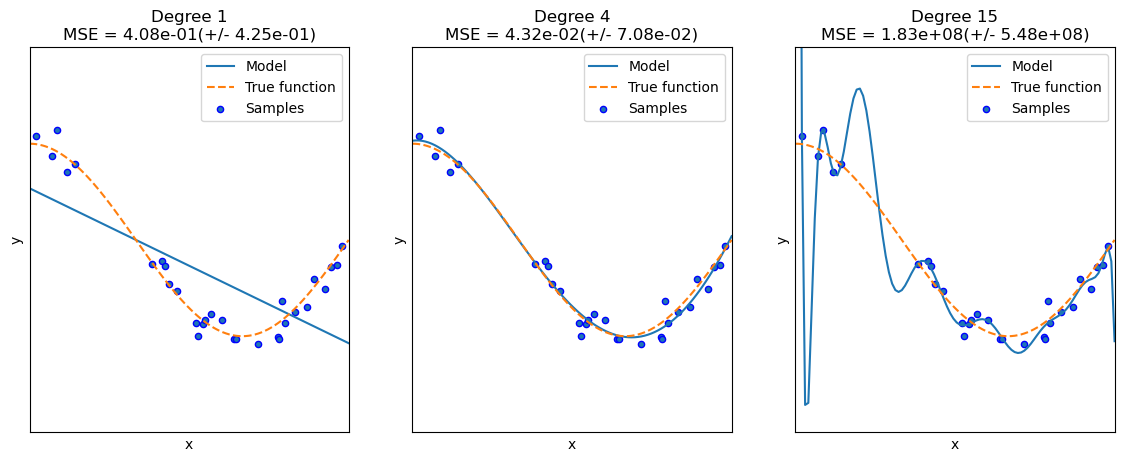

In [39]:
plt.figure(figsize=(14, 5))
degrees = [1, 4, 15]

# 다항 회귀의 차수(degree)를 1, 4, 15로 각각 변화시키면서 비교합니다.
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())
    
    # 개별 degree별로 Polynomial 변환합니다.
    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X.reshape(-1, 1), y)
    
    # 교차 검증으로 다항 회귀를 평가합니다.
    scores = cross_val_score(pipeline, X.reshape(-1, 1), y, scoring="neg_mean_squared_error", cv=10)
    
    #pipeline을 구성하는 세부 객체를 접근하는 named_steps['객체명']을 이용해 회귀계수 추출
    confficients = pipeline.named_steps['linear_regression'].coef_
    print('\nDegree {0} 회귀 계수는 {1} 입니다.'.format(degrees[i], np.round(coefficients, 2)))
    print('Degree {0} MSE 는 {1} 입니다.'.format(degrees[i], -1*np.mean(scores)))
    
    
    #0 부터 1까지 테스트 데이터 세트를 100개로 나눠 예측을 수행합니다.
    # 테스트 데이터 세트에 회귀 예측을 수행하고 예측 곡선과 실제 곡선을 그려서 비교합니다.
    
    X_test = np.linspace(0,1,100)
    
    #예측값 곡선
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    
    #실제값 곡선
    plt.plot(X_test, true_fun(X_test), '--', label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    
    plt.xlabel("x"); plt.ylabel("y"); plt.xlim((0, 1)); plt.ylim((-2, 2)); plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(degrees[i], -scores.mean(), scores.std()))
    
    
plt.show()